In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('merged_data.csv')
# Display the first few rows of each dataset
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72561,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301,Varies with device,"1,000,000+",Free,0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
72562,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE,4.1,28301,Varies with device,"1,000,000+",Free,0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
72563,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301,Varies with device,"1,000,000+",Free,0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
72564,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301,Varies with device,"1,000,000+",Free,0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up


In [3]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity,Rating,Reviews
count,72566.000000,72566.000000,72566.000000,7.256600e+04
mean,0.157187,0.494180,4.333641,2.560691e+06
std,0.332585,0.240024,0.280750,6.782015e+06
min,-1.000000,0.000000,2.600000,4.600000e+01
25%,0.000000,0.380000,4.200000,2.466600e+04
50%,0.129167,0.509740,4.400000,1.972950e+05
75%,0.355625,0.633333,4.500000,1.855262e+06
max,1.000000,1.000000,4.900000,7.815831e+07


In [4]:
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
dtype: int64

In [5]:
df.nunique()

App                         816
Translated_Review         26682
Sentiment                     3
Sentiment_Polarity         5295
Sentiment_Subjectivity     4382
Category                     33
Rating                       22
Reviews                    1067
Size                        168
Installs                     12
Type                          2
Price                         9
Content Rating                5
Genres                       68
Last Updated                250
Current Ver                 506
Android Ver                  22
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72566 entries, 0 to 72565
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Translated_Review       72566 non-null  object 
 2   Sentiment               72566 non-null  object 
 3   Sentiment_Polarity      72566 non-null  float64
 4   Sentiment_Subjectivity  72566 non-null  float64
 5   Category                72566 non-null  object 
 6   Rating                  72566 non-null  float64
 7   Reviews                 72566 non-null  int64  
 8   Size                    72566 non-null  object 
 9   Installs                72566 non-null  object 
 10  Type                    72566 non-null  object 
 11  Price                   72566 non-null  object 
 12  Content Rating          72566 non-null  object 
 13  Genres                  72566 non-null  object 
 14  Last Updated            72566 non-null

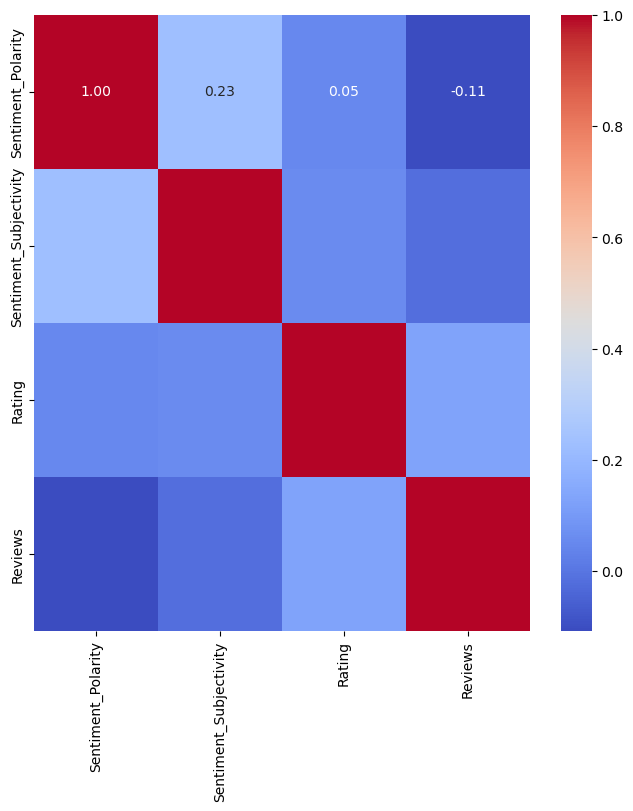

In [7]:
# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_cols]

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [8]:
# Sort apps by rating and reviews
best_apps = df.sort_values(by=['Rating', 'Reviews'], ascending=False)

# Display the top best apps
best_apps

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
40892,Down Dog: Great Yoga Anywhere,One best I could find yoga home. I yoga expert...,Positive,0.460000,0.440000,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up
40893,Down Dog: Great Yoga Anywhere,"I've never done yoga, nervous start. Being abl...",Positive,0.194381,0.591644,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up
40894,Down Dog: Great Yoga Anywhere,This fantastic! I love I customize style durat...,Positive,0.218795,0.438997,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up
40895,Down Dog: Great Yoga Anywhere,This surprisingly good! I travel lot I've neve...,Positive,0.326944,0.578889,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up
40896,Down Dog: Great Yoga Anywhere,"This really calm, relaxing feel choice 5 style...",Positive,0.081429,0.607143,HEALTH_AND_FITNESS,4.9,28945,12M,"500,000+",Free,0,Teen,Health & Fitness,"May 17, 2018",2.6.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10203,Anthem BC Anywhere,Awful non functional,Negative,-1.000000,1.000000,MEDICAL,2.6,496,24M,"100,000+",Free,0,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up
10204,Anthem BC Anywhere,Add 2FA support mobile app. PS. Your technical...,Negative,-0.266667,0.300000,MEDICAL,2.6,496,24M,"100,000+",Free,0,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up
10205,Anthem BC Anywhere,Add 2FA support mobile app. PS. Your technical...,Negative,-0.266667,0.300000,MEDICAL,2.6,496,24M,"100,000+",Free,0,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up
10206,Anthem BC Anywhere,Apps update can't it. When update days compati...,Neutral,0.000000,0.000000,MEDICAL,2.6,496,24M,"100,000+",Free,0,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Filter the dataset for positive reviews
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()

# Scale numerical features
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Define features and target
# Exclude non-numeric columns from the features
X = positive_reviews_df.select_dtypes(include=[float, int])
y = positive_reviews_df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.431128916631067e-32
R-squared: 1.0


In [15]:
# Check for any columns in X that have a constant value or are too closely related to the target variable
for col in X.columns:
    if X[col].std() == 0 or X[col].corr(y) > 0.999:
        print(f"Column to investigate: {col}")

# Examine the distribution of the target variable
print(y.describe())

Column to investigate: Rating
count    46164.000000
mean         4.351265
std          0.268281
min          2.600000
25%          4.200000
50%          4.400000
75%          4.600000
max          4.900000
Name: Rating, dtype: float64


In [16]:
# Remove the 'Rating' column from the feature set
X = X.drop(['Rating'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.06917802649877275
R-squared: 0.021013676274305615


In [17]:
# Define bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.5, 5]
labels = ['Low', 'Medium', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define the target variable for classification
y_class = positive_reviews_df['RatingCategory']

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a Random Forest classifier with class weights and limited max_depth
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=5)
clf.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(clf, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        High       0.41      0.67      0.51      3487
         Low       0.09      0.68      0.16       153
 Medium-High       0.66      0.23      0.34      6273
  Medium-Low       0.45      0.55      0.49      3937

    accuracy                           0.44     13850
   macro avg       0.40      0.53      0.37     13850
weighted avg       0.53      0.44      0.42     13850



## Hyperparameters

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Define bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.5, 5]
labels = ['Low', 'Medium', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, None],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required at a leaf node
}

# Create a GridSearchCV object with Random Forest classifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,              # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1          # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a Random Forest classifier with the best hyperparameters from grid search
best_clf = RandomForestClassifier(**grid_search.best_params_, random_state=42, class_weight='balanced')
best_clf.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class_best = best_clf.predict(X_test_class)

# Print the classification report
print("Classification Report with Best Hyperparameters:")
print(classification_report(y_test_class, y_pred_class_best))

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9295352403101378
Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

        High       0.94      0.82      0.88      3487
         Low       0.86      0.47      0.61       153
      Medium       0.94      0.98      0.96     10210

    accuracy                           0.94     13850
   macro avg       0.91      0.76      0.81     13850
weighted avg       0.94      0.94      0.93     13850



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a logistic regression model with class weights
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(log_reg, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        High       0.37      0.33      0.35      3487
         Low       0.03      0.92      0.05       153
 Medium-High       0.53      0.14      0.22      6273
  Medium-Low       0.32      0.30      0.31      3937

    accuracy                           0.24     13850
   macro avg       0.31      0.42      0.23     13850
weighted avg       0.42      0.24      0.28     13850



## Hyperparameters

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for logistic regression
param_grid = {
    'C': [0.1, 1, 10],            # Inverse of regularization strength
    'solver': ['lbfgs', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 500, 1000]  # Maximum number of iterations taken for the solvers to converge
}

# Create a GridSearchCV object with logistic regression and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,               # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1           # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(**grid_search.best_params_, random_state=42, class_weight='balanced')
best_log_reg.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class_best = best_log_reg.predict(X_test_class)

# Print the classification report
print("Classification Report with Best Hyperparameters:")
print(classification_report(y_test_class, y_pred_class_best))


Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Best score: 0.2471993879116575
Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

        High       0.35      0.36      0.36      3487
         Low       0.03      0.88      0.05       153
 Medium-High       0.49      0.12      0.19      6273
  Medium-Low       0.29      0.29      0.29      3937

    accuracy                           0.24     13850
   macro avg       0.29      0.41      0.22     13850
weighted avg       0.39      0.24      0.26     13850



In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(knn, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

        High       0.58      0.58      0.58      3487
         Low       0.15      0.07      0.10       153
 Medium-High       0.65      0.70      0.68      6273
  Medium-Low       0.59      0.53      0.56      3937

    accuracy                           0.61     13850
   macro avg       0.49      0.47      0.48     13850
weighted avg       0.61      0.61      0.61     13850



## Hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],   # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric to use
}

# Create a GridSearchCV object with the KNN classifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,               # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1           # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**grid_search.best_params_)
best_knn.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class_best = best_knn.predict(X_test_class)

# Print the classification report with the best hyperparameters
print("Classification Report with Best Hyperparameters:")
print(classification_report(y_test_class, y_pred_class_best))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best score: 0.8270100071578554
Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

        High       0.87      0.82      0.85      3487
         Low       0.59      0.35      0.44       153
 Medium-High       0.86      0.88      0.87      6273
  Medium-Low       0.80      0.83      0.81      3937

    accuracy                           0.84     13850
   macro avg       0.78      0.72      0.74     13850
weighted avg       0.84      0.84      0.84     13850



In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(decision_tree, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.96      0.96      3487
         Low       0.93      0.82      0.87       153
 Medium-High       0.96      0.97      0.96      6273
  Medium-Low       0.93      0.94      0.93      3937

    accuracy                           0.95     13850
   macro avg       0.95      0.92      0.93     13850
weighted avg       0.95      0.95      0.95     13850



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a Random Forest classifier with class weights
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(random_forest, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

        High       0.82      0.73      0.77      3487
         Low       0.77      0.37      0.50       153
 Medium-High       0.79      0.84      0.81      6273
  Medium-Low       0.75      0.76      0.76      3937

    accuracy                           0.79     13850
   macro avg       0.78      0.68      0.71     13850
weighted avg       0.79      0.79      0.78     13850



## Hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, None],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required at a leaf node
}

# Create a GridSearchCV object with the Random Forest classifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,               # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1           # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42, class_weight='balanced')
best_rf.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class_best = best_rf.predict(X_test_class)

# Print the classification report with the best hyperparameters
print("Classification Report with Best Hyperparameters:")
print(classification_report(y_test_class, y_pred_class_best))


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8542119312307619
Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

        High       0.90      0.84      0.87      3487
         Low       0.82      0.53      0.64       153
 Medium-High       0.87      0.91      0.89      6273
  Medium-Low       0.85      0.85      0.85      3937

    accuracy                           0.87     13850
   macro avg       0.86      0.78      0.81     13850
weighted avg       0.87      0.87      0.87     13850



In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train an AdaBoost classifier
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(ada_boost, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.43      0.40      3487
         Low       0.31      0.10      0.15       153
 Medium-High       0.52      0.34      0.41      6273
  Medium-Low       0.39      0.57      0.47      3937

    accuracy                           0.43     13850
   macro avg       0.40      0.36      0.36     13850
weighted avg       0.45      0.43      0.42     13850



## Hyperparameters

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],                 # Number of weak learners to train iteratively
    'learning_rate': [0.01, 0.1, 1],                # Learning rate shrinks the contribution of each classifier
    'base_estimator__max_depth': [1, 2, 3]          # Maximum depth of the individual estimators
}

# Create a GridSearchCV object with the AdaBoost classifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
    param_grid=param_grid,
    cv=5,               # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1           # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Extract the best max_depth for the base_estimator (DecisionTreeClassifier)
best_max_depth = grid_search.best_params_['base_estimator__max_depth']

# Train an AdaBoost classifier with the best hyperparameters
best_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=best_max_depth),
                              n_estimators=grid_search.best_params_['n_estimators'],
                              learning_rate=grid_search.best_params_['learning_rate'],
                              random_state=42)
best_ada.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class_best = best_ada.predict(X_test_class)

# Print the classification report with the best hyperparameters
print("Classification Report with Best Hyperparameters:")
print(classification_report(y_test_class, y_pred_class_best))


C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Best score: 0.7256611151265402


C:\Users\nihar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report with Best Hyperparameters:
              precision    recall  f1-score   support

        High       0.97      0.42      0.59      3487
         Low       0.98      0.85      0.91       153
 Medium-High       0.66      0.94      0.78      6273
  Medium-Low       0.83      0.69      0.75      3937

    accuracy                           0.74     13850
   macro avg       0.86      0.73      0.76     13850
weighted avg       0.79      0.74      0.73     13850



In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a Support Vector Machine classifier
svm = SVC(random_state=42, class_weight='balanced')
svm.fit(X_train_class, y_train_class)

# Use cross-validation to make predictions on the test set
y_pred_class = cross_val_predict(svm, X_test_class, y_test_class, cv=5)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        High       0.47      0.48      0.47      3487
         Low       0.02      0.81      0.05       153
 Medium-High       0.85      0.16      0.27      6273
  Medium-Low       0.35      0.36      0.35      3937

    accuracy                           0.30     13850
   macro avg       0.42      0.45      0.29     13850
weighted avg       0.60      0.30      0.34     13850



In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'gamma': [1, 0.1, 0.01],       # Kernel coefficient
    'kernel': ['rbf', 'linear']    # Kernel type
}

# Create a GridSearchCV object with SVM classifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=SVC(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,              # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1          # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train an SVM classifier with the best hyperparameters
best_svm = SVC(**grid_search.best_params_, random_state=42, class_weight='balanced')
best_svm.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class = best_svm.predict(X_test_class)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.36253656446789245
Classification Report:
              precision    recall  f1-score   support

        High       0.51      0.50      0.51      3487
         Low       0.03      0.81      0.06       153
 Medium-High       0.81      0.24      0.38      6273
  Medium-Low       0.37      0.41      0.39      3937

    accuracy                           0.36     13850
   macro avg       0.43      0.49      0.33     13850
weighted avg       0.60      0.36      0.41     13850



In [55]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Create a pipeline with PCA and SVM
pipeline = Pipeline([
    ('pca', PCA(n_components=2)),  # Reduce dimensionality to 2 principal components
    ('svm', SVC(random_state=42, class_weight='balanced'))  # SVM classifier
])

# Train the pipeline on the training data
pipeline.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class = pipeline.predict(X_test_class)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        High       0.43      0.49      0.46      3487
         Low       0.02      0.73      0.04       153
 Medium-High       0.93      0.13      0.23      6273
  Medium-Low       0.35      0.34      0.34      3937

    accuracy                           0.29     13850
   macro avg       0.43      0.42      0.27     13850
weighted avg       0.63      0.29      0.32     13850



In [56]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Create a pipeline with PCA and SVM
pipeline = Pipeline([
    ('pca', PCA()),  # PCA for dimensionality reduction
    ('svm', SVC(random_state=42, class_weight='balanced'))  # SVM classifier
])

# Define the hyperparameter grid for PCA and SVM
param_grid = {
    'pca__n_components': [2, 3],                         # Number of principal components
    'svm__C': [0.1, 1, 10],                              # Regularization parameter for SVM
    'svm__gamma': [1, 0.1, 0.01],                        # Kernel coefficient for SVM
    'svm__kernel': ['rbf', 'linear']                     # Kernel type for SVM
}

# Create a GridSearchCV object with the pipeline and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,              # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1          # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the pipeline with the best hyperparameters
best_pipeline = grid_search.best_estimator_

# Make predictions on the test set
y_pred_class = best_pipeline.predict(X_test_class)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Best parameters: {'pca__n_components': 3, 'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best score: 0.36256750984929426
Classification Report:
              precision    recall  f1-score   support

        High       0.51      0.50      0.51      3487
         Low       0.03      0.81      0.06       153
 Medium-High       0.81      0.24      0.38      6273
  Medium-Low       0.37      0.41      0.39      3937

    accuracy                           0.36     13850
   macro avg       0.43      0.49      0.33     13850
weighted avg       0.60      0.36      0.41     13850



In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Train a Gradient Boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class = gb.predict(X_test_class)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

        High       0.93      0.77      0.84      3487
         Low       0.97      0.96      0.97       153
 Medium-High       0.82      0.92      0.87      6273
  Medium-Low       0.83      0.79      0.81      3937

    accuracy                           0.85     13850
   macro avg       0.89      0.86      0.87     13850
weighted avg       0.85      0.85      0.84     13850



## Hyperparameters

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and preprocess the dataset
positive_reviews_df = df[df['Sentiment'] == 'Positive'].copy()
numerical_features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews']
scaler = StandardScaler()
positive_reviews_df[numerical_features] = scaler.fit_transform(positive_reviews_df[numerical_features])

# Adjust bins and labels for the 'Rating' categories
bins = [0, 3.5, 4.2, 4.5, 5]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
positive_reviews_df['RatingCategory'] = pd.cut(positive_reviews_df['Rating'], bins=bins, labels=labels)

# Define features and target for classification
X = positive_reviews_df[numerical_features]  # Using only the scaled numerical features
y_class = positive_reviews_df['RatingCategory']

# Split the data into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with Gradient Boosting classifier and the hyperparameter grid
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,              # Number of folds in cross-validation
    scoring='accuracy', # Metric to optimize
    n_jobs=-1          # Use all available cores
)

# Fit the grid search to the training data
grid_search.fit(X_train_class, y_train_class)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train a Gradient Boosting classifier with the best hyperparameters
best_gb = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb.fit(X_train_class, y_train_class)

# Make predictions on the test set
y_pred_class = best_gb.predict(X_test_class)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.9961935887893244
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3487
         Low       0.99      0.99      0.99       153
 Medium-High       1.00      1.00      1.00      6273
  Medium-Low       1.00      1.00      1.00      3937

    accuracy                           1.00     13850
   macro avg       1.00      1.00      1.00     13850
weighted avg       1.00      1.00      1.00     13850

